In [49]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.datasets import load_iris

In [50]:
data = load_iris()

X, y = data.data, data.target

In [51]:
dataframe = pd.DataFrame(X, columns=data.feature_names)

dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler().fit(X)

X_normalized = normalizer.transform(X)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [54]:
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [45]:
from src.models import Sequential
from src.layers import Dense, ReLU
from src.optimizers import SGD
from src.losses import CrossEntropyLoss

model = Sequential([
    Dense(20, activation=ReLU()),
    Dense(20, activation=ReLU()),
    Dense(20, activation=ReLU()),
    Dense(3)
])

model.compile(
    loss=CrossEntropyLoss(),
    optimizer=SGD(learning_rate=5e-2),
)

In [46]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, x_val=X_test, y_val=y_test)

Epoch 1/100 - loss: 2.2007 - val_accuracy: 0.6000
Epoch 2/100 - loss: 2.4106 - val_accuracy: 0.6000
Epoch 3/100 - loss: 2.3361 - val_accuracy: 0.6000
Epoch 4/100 - loss: 2.6509 - val_accuracy: 0.6000
Epoch 5/100 - loss: 2.3421 - val_accuracy: 0.6000
Epoch 6/100 - loss: 2.5338 - val_accuracy: 0.6000
Epoch 7/100 - loss: 1.8720 - val_accuracy: 0.6000
Epoch 8/100 - loss: 2.8300 - val_accuracy: 0.6000
Epoch 9/100 - loss: 1.7221 - val_accuracy: 0.6000
Epoch 10/100 - loss: 1.6912 - val_accuracy: 0.6000
Epoch 11/100 - loss: 1.2941 - val_accuracy: 0.6000
Epoch 12/100 - loss: 1.4829 - val_accuracy: 0.6000
Epoch 13/100 - loss: 1.3326 - val_accuracy: 0.6000
Epoch 14/100 - loss: 1.8453 - val_accuracy: 0.6000
Epoch 15/100 - loss: 1.2443 - val_accuracy: 0.5667
Epoch 16/100 - loss: 1.4698 - val_accuracy: 0.5667
Epoch 17/100 - loss: 1.6354 - val_accuracy: 0.5667
Epoch 18/100 - loss: 1.3037 - val_accuracy: 0.5667
Epoch 19/100 - loss: 0.9367 - val_accuracy: 0.5667
Epoch 20/100 - loss: 1.3629 - val_accura

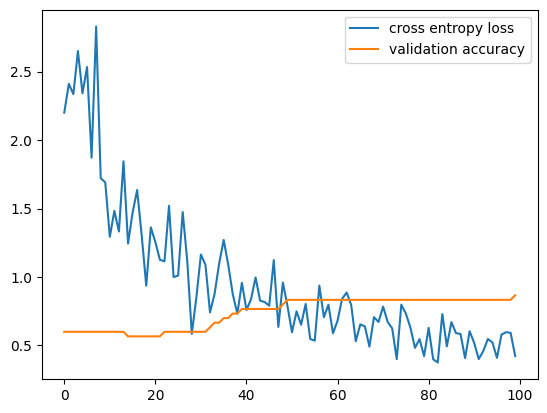

In [48]:
plt.plot(history['loss'], label='cross entropy loss')
plt.plot(history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()